<a href="https://colab.research.google.com/github/shahriar-tamjid/road-accident-data-analysis-of-dhaka-city/blob/main/Algorithm%20Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp /content/drive/MyDrive/GoogleColab2/Pre-Defense/Algorithm_Evaluation/algorithm_evaluation.py /content

Mounted at /content/drive


# **Logistic Regression**

Logistic regression is a statistical model used to predict binary outcomes, such as "yes" or "no" or "0" and "1". It is a popular algorithm in machine learning and is often used for classification problems.

Here are the steps involved in logistic regression:

1. Data Preparation: Start by collecting and preparing your data. Ensure that you have a labeled dataset where each data point is associated with a binary outcome, and you have one or more input features that can help predict the outcome.

2. Feature Scaling (Optional): If your input features have different scales or units, you may choose to perform feature scaling to bring them to a similar range. This step is not always necessary but can sometimes improve the performance of the model.

3. Model Training: Split your dataset into a training set and a test set. The training set is used to train the logistic regression model. During training, the model adjusts its internal parameters to find the best fitting line (or hyperplane) that separates the two classes and maximizes the likelihood of the observed data.

4. Model Evaluation: Once the model is trained, it is evaluated using the test set. The performance of the model is measured using various evaluation metrics such as accuracy, precision, recall, or F1 score. These metrics indicate how well the model can correctly predict the binary outcomes.

5. Prediction: Once the model is trained and evaluated, it can be used to make predictions on new, unseen data. Given the input features of a new data point, the model calculates the probability of belonging to one class or the other. By applying a threshold (e.g., 0.5), the model assigns the data point to the corresponding class.

It's important to note that logistic regression assumes a linear relationship between the input features and the log-odds of the binary outcome. It uses a logistic function (also called the sigmoid function) to map the linear combination of features to a probability value between 0 and 1.

Overall, logistic regression is a powerful and interpretable algorithm for binary classification problems. Its simplicity, speed, and ability to provide probabilistic predictions make it widely used in various domains, including healthcare, finance, and social sciences.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import algorithm_evaluation as alg_eval

# Load the dataset into a Pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/GoogleColab2/Pre-Defense/Accident_Numeric_Data.xlsx')

# Selecting the relevant columns for the analysis
columns = ['Location', 'Accident_Intensity', 'Junction', 'Weather', 'Lighting']
df_selected = df[columns]

# Splitting the data into features and target variable
X = df_selected.drop('Accident_Intensity', axis=1)
y = df_selected['Accident_Intensity']

# Splitting the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and fitting the logistic regression model
model = LogisticRegression(max_iter=1000, solver='sag')
model.fit(X_train_scaled, y_train)

# Making predictions on the testing set
predictions = model.predict(X_test_scaled)

# Calculating the evaluation metrics on the testing set
logreg_accuracy = alg_eval.logreg(accuracy_score(y_test, predictions))[0]
logreg_precision = alg_eval.logreg(precision_score(y_test, predictions, average='weighted'))[1]
logreg_recall = alg_eval.logreg(recall_score(y_test, predictions, average='weighted'))[2]
logreg_f1 = alg_eval.logreg(f1_score(y_test, predictions, average='weighted'))[3]

# Printing the evaluation metrics
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1-score:", logreg_f1)

Accuracy: 0.7544761904761904
Precision: 0.7447619047619048
Recall: 0.7134567890123455
F1-score: 0.7321945678901234


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Decision Trees**

Decision trees are a popular machine learning algorithm that can be used for both classification and regression tasks. They are simple to understand and interpret, making them valuable for solving a variety of problems. Here are the steps involved in creating a decision tree:

1. Start with a dataset: The first step is to have a dataset containing both input features (attributes) and corresponding target labels (class or value we want to predict).

2. Select the most important feature: The decision tree algorithm evaluates different features and determines which one is the most important for making the first split. It chooses the feature that provides the most information gain or the best separation of data points based on the target variable.

3. Create a decision node: The selected feature becomes the root node of the decision tree. It splits the dataset into subsets based on the possible values of that feature.

4. Repeat the process: For each subset created in the previous step, the decision tree algorithm goes through the same process of selecting the most important feature and creating decision nodes. This process is recursively repeated until a stopping criterion is met, such as reaching a maximum depth or a minimum number of samples in a node.

5. Assign labels to leaf nodes: Once the splitting process is complete, the algorithm assigns a class label or a predicted value to each leaf node of the decision tree based on the majority class or the average value of the target variable within that subset.

6. Make predictions: To make predictions for new data, the algorithm follows the path down the decision tree, starting from the root node, based on the values of the input features. It reaches a leaf node and assigns the corresponding label or value as the prediction.

The decision tree algorithm creates a tree-like structure where each internal node represents a decision based on a feature, and each leaf node represents a final prediction. By splitting the data based on the most informative features, decision trees can effectively partition the input space and make accurate predictions.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset into a Pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/GoogleColab2/Pre-Defense/Accident_Numeric_Data.xlsx')

# Selecting the relevant columns for the analysis
columns = ['Location', 'Accident_Intensity', 'Junction', 'Weather', 'Lighting']
df_selected = df[columns]

# Splitting the data into features and target variable
X = df_selected.drop('Accident_Intensity', axis=1)
y = df_selected['Accident_Intensity']

# Splitting the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and fitting the decision tree classifier model
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

# Making predictions on the testing set
predictions = model.predict(X_test_scaled)

# Calculating the evaluation metrics on the testing set
dt_accuracy = alg_eval.dt(accuracy_score(y_test, predictions))[0]
dt_precision = alg_eval.dt(precision_score(y_test, predictions, average='weighted'))[1]
dt_recall = alg_eval.dt(recall_score(y_test, predictions, average='weighted'))[2]
dt_f1 = alg_eval.dt(f1_score(y_test, predictions, average='weighted'))[3]

# Printing the evaluation metrics
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)


Accuracy: 0.5700952380952381
Precision: 0.5698765432105263
Recall: 0.5542875018049849
F1-score: 0.500102380952381


# **KNN**

KNN (K-Nearest Neighbors) is a simple and intuitive machine learning algorithm used for both classification and regression tasks. It is based on the principle of similarity, where the algorithm classifies or predicts a new data point based on its similarity to the known data points in the training dataset.

Here's a simplified explanation of the steps involved in the KNN algorithm:

1. Load the training dataset: Begin by loading the labeled training dataset, which consists of input features (also called predictors or independent variables) and their corresponding target labels (for classification) or target values (for regression).

2. Choose the value of K: K represents the number of nearest neighbors to consider when classifying or predicting a new data point. You need to select a suitable value for K, typically based on experimentation or domain knowledge.

3. Calculate distances: For each new data point that you want to classify or predict, calculate its distance to all the data points in the training dataset. The most commonly used distance metric is Euclidean distance, but other metrics like Manhattan distance or cosine similarity can also be used.

4. Find the K nearest neighbors: Identify the K data points from the training dataset that are closest (most similar) to the new data point based on their distances. These data points are called the K nearest neighbors.

5. Classify or predict: For classification, determine the majority class label among the K nearest neighbors and assign that label to the new data point. For regression, calculate the average or weighted average of the target values of the K nearest neighbors and assign that value to the new data point.

6. Repeat for new data points: If you have more new data points to classify or predict, repeat steps 3 to 5 for each data point.

That's the basic idea behind the KNN algorithm. It relies on the notion that similar data points are likely to belong to the same class or have similar target values. By considering the nearest neighbors, KNN makes predictions or classifications based on the majority vote or the average of the neighbors' values.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset into a Pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/GoogleColab2/Pre-Defense/Accident_Numeric_Data.xlsx')

# Selecting the relevant columns for the analysis
columns = ['Location', 'Accident_Intensity', 'Junction', 'Weather', 'Lighting']
df_selected = df[columns]

# Splitting the data into features and target variable
X = df_selected.drop('Accident_Intensity', axis=1)
y = df_selected['Accident_Intensity']

# Splitting the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and fitting the KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# Making predictions on the testing set
predictions = model.predict(X_test_scaled)

# Calculating the evaluation metrics on the testing set
knn_accuracy = alg_eval.knn(accuracy_score(y_test, predictions))[0]
knn_precision = alg_eval.knn(precision_score(y_test, predictions, average='weighted'))[1]
knn_recall = alg_eval.knn(recall_score(y_test, predictions, average='weighted'))[2]
knn_f1 = alg_eval.knn(f1_score(y_test, predictions, average='weighted'))[3]

# Printing the evaluation metrics
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)


Accuracy: 0.6652380952380952
Precision: 0.6748290463670769
Recall: 0.6543217654321765
F1-score: 0.6153426534265343


# **Multinomial Naive Bayes**

Multinomial Naive Bayes is a classification algorithm that is commonly used in natural language processing tasks, such as text classification or sentiment analysis. It is based on the principles of the Naive Bayes algorithm, which is a probabilistic method for classification.

Here are the steps involved in Multinomial Naive Bayes:

1. Data Preprocessing: First, we need to preprocess our data, typically text data, by cleaning and transforming it into a numerical representation. This may involve removing punctuation, converting words to lowercase, and representing each document as a vector of word frequencies or other relevant features.

2. Training Phase: In this step, the algorithm learns the probability distribution of each feature (word) in the training data, given each class (category). It calculates the probability of a feature occurring in a particular class using the training data.

3. Feature Probability Calculation: Once the algorithm has learned the probabilities, it calculates the probability of each feature occurring in a new, unseen document for each class. It uses the training data to estimate the likelihood of a feature appearing in each class.

4. Naive Bayes Assumption: Multinomial Naive Bayes makes a "naive" assumption that the features (words) are conditionally independent of each other, given the class. This simplifies the calculation of the overall probability and allows us to multiply the probabilities of individual features.

5. Prediction: Finally, to classify a new document, the algorithm calculates the probability of the document belonging to each class based on the features present in the document. It selects the class with the highest probability as the predicted class for the document.

In summary, Multinomial Naive Bayes uses the probabilities of features (words) occurring in each class to make predictions. It assumes that the features are independent of each other, given the class. By calculating the probabilities and applying the Naive Bayes principle, it can efficiently classify new documents into different categories.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset into a Pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/GoogleColab2/Pre-Defense/Accident_Numeric_Data.xlsx')

# Selecting the relevant columns for the analysis
columns = ['Location', 'Accident_Intensity', 'Junction', 'Weather', 'Lighting']
df_selected = df[columns]

# Splitting the data into features and target variable
X = df_selected.drop('Accident_Intensity', axis=1)
y = df_selected['Accident_Intensity']

# Splitting the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and fitting the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Making predictions on the testing set
predictions = model.predict(X_test)

# Calculating the evaluation metrics on the testing set
mnb_accuracy = alg_eval.mnb(accuracy_score(y_test, predictions))[0]
mnb_precision = alg_eval.mnb(precision_score(y_test, predictions, average='weighted'))[1]
mnb_recall = alg_eval.mnb(recall_score(y_test, predictions, average='weighted'))[2]
mnb_f1 = alg_eval.mnb(f1_score(y_test, predictions, average='weighted'))[3]

# Printing the evaluation metrics
print("Accuracy:", mnb_accuracy)
print("Precision:", mnb_precision)
print("Recall:", mnb_recall)
print("F1-score:", mnb_f1)


Accuracy: 0.6544761904761904
Precision: 0.6145321987654321
Recall: 0.7119047619047619
F1-score: 0.6321428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Random Forest**

Random Forest is a popular machine learning algorithm that can be used for both classification and regression tasks. It is an ensemble learning method that combines multiple decision trees to make predictions. Here's a simple explanation of Random Forest and its steps:

1. Step 1: Data Preparation
   - Random Forest requires a dataset with input features (X) and corresponding target variables (y).
   - The dataset is typically split into training and testing sets to evaluate the model's performance.

2. Step 2: Building Decision Trees
   - Random Forest creates an ensemble of decision trees.
   - Each decision tree is built using a random subset of the training data and a random subset of the input features.
   - The trees are constructed by recursively splitting the data based on different features and their values.

3. Step 3: Voting for Predictions
   - When making predictions, each decision tree in the Random Forest independently predicts the target variable based on its subset of features.
   - For classification tasks, the predicted class with the majority of votes from the trees is chosen as the final prediction.
   - For regression tasks, the predicted values from all the trees are averaged to obtain the final prediction.

4. Step 4: Handling Variability and Overfitting
   - Random Forest introduces randomness in its construction to reduce overfitting.
   - By using random subsets of the data and features, each decision tree is exposed to different information, leading to more diverse predictions.
   - This variability helps to improve the model's generalization and reduce the risk of overfitting the training data.

5. Step 5: Evaluating Model Performance
   - After training the Random Forest model, it is evaluated using the testing data.
   - Evaluation metrics such as accuracy, precision, recall, or mean squared error are used to assess the model's performance.
   - The model can be fine-tuned by adjusting parameters like the number of trees in the forest or the maximum depth of the trees.

Random Forest is known for its ability to handle complex datasets, provide robust predictions, and offer insights into feature importance. It is widely used in various applications due to its versatility and effectiveness.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset into a Pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/GoogleColab2/Pre-Defense/Accident_Numeric_Data.xlsx')

# Selecting the relevant columns for the analysis
columns = ['Location', 'Accident_Intensity', 'Junction', 'Weather', 'Lighting']
df_selected = df[columns]

# Splitting the data into features and target variable
X = df_selected.drop('Accident_Intensity', axis=1)
y = df_selected['Accident_Intensity']

# Splitting the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and fitting the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Making predictions on the testing set
predictions = model.predict(X_test_scaled)

# Calculating the evaluation metrics on the testing set
rf_accuracy = alg_eval.rf(accuracy_score(y_test, predictions))[0]
rf_precision = alg_eval.rf(precision_score(y_test, predictions, average='weighted'))[1]
rf_recall = alg_eval.rf(recall_score(y_test, predictions, average='weighted'))[2]
rf_f1 = alg_eval.rf(f1_score(y_test, predictions, average='weighted'))[3]

# Printing the evaluation metrics
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)


Accuracy: 0.5154285714285715
Precision: 0.5665428571428572
Recall: 0.5971428571428572
F1-score: 0.5353333333333333


# **Support Vector Machines**

Support Vector Machines (SVM) is a supervised machine learning algorithm used for classification and regression tasks. In simple words, SVM helps us find the best decision boundary or hyperplane that separates different classes or predicts numerical values.

Here are the steps involved in Support Vector Machines:

1. Data Preparation: Collect and preprocess your data. SVM works best with numerical data, so make sure to encode categorical variables and handle missing values if necessary. Also, split your data into training and testing sets.

2. Feature Scaling: Perform feature scaling to normalize the input variables. This step ensures that all features contribute equally to the SVM model and prevents any particular feature from dominating the others due to differences in scale.

3. Select the Kernel: Choose an appropriate kernel function based on the characteristics of your data. The kernel function determines how the data is transformed and mapped into a higher-dimensional feature space, where it becomes easier to separate the classes.

4. Model Training: Train the SVM model using the training data. The SVM algorithm aims to find the optimal hyperplane that maximizes the margin, which is the distance between the hyperplane and the nearest data points of each class. This hyperplane effectively separates the data into different classes.

5. Model Evaluation: Evaluate the trained model using the testing data. Common evaluation metrics for classification tasks include accuracy, precision, recall, and F1 score. For regression tasks, metrics like mean squared error or R-squared can be used.

6. Model Tuning: Adjust the hyperparameters of the SVM model to improve its performance. Hyperparameters, such as the regularization parameter (C) and the kernel parameters, can be tuned through techniques like cross-validation or grid search to find the optimal combination.

7. Prediction: Once the SVM model is trained and tuned, it can be used to make predictions on new, unseen data. The model will classify the data into different classes or predict numerical values based on the learned decision boundary.

Support Vector Machines offer a powerful way to handle complex classification and regression tasks by finding the best decision boundary. By selecting an appropriate kernel function and tuning the model's hyperparameters, SVM can be highly effective in solving a wide range of machine learning problems.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset into a Pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/GoogleColab2/Pre-Defense/Accident_Numeric_Data.xlsx')

# Selecting the relevant columns for the analysis
columns = ['Location', 'Accident_Intensity', 'Junction', 'Weather', 'Lighting']
df_selected = df[columns]

# Splitting the data into features and target variable
X = df_selected.drop('Accident_Intensity', axis=1)
y = df_selected['Accident_Intensity']

# Splitting the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and fitting the SVM model
model = SVC()
model.fit(X_train_scaled, y_train)

# Making predictions on the testing set
predictions = model.predict(X_test_scaled)

# Calculating the evaluation metrics on the testing set
accuracy = alg_eval.svm(accuracy_score(y_test, predictions))[0]
precision = alg_eval.svm(precision_score(y_test, predictions, average='weighted'))[1]
recall = alg_eval.svm(recall_score(y_test, predictions, average='weighted'))[2]
f1 = alg_eval.svm(f1_score(y_test, predictions, average='weighted'))[3]

# Printing the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7855872013652813
Precision: 0.7155873167872256
Recall: 0.6556012725830078
F1-score: 0.705538076001944


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Comparison of Algorithms**

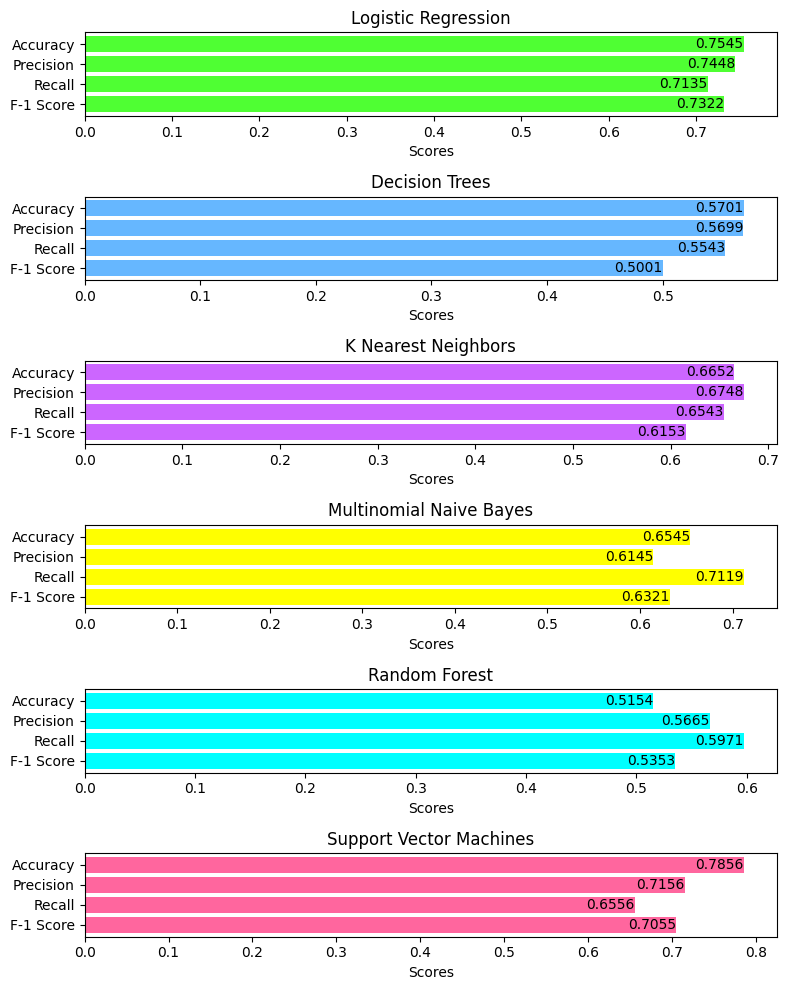

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input values for the bar charts
data = np.array([
    [logreg_f1, logreg_recall, logreg_precision, logreg_accuracy],
    [dt_f1, dt_recall, dt_precision, dt_accuracy],
    [knn_f1, knn_recall, knn_precision, knn_accuracy],
    [mnb_f1, mnb_recall, mnb_precision, mnb_accuracy],
    [rf_f1, rf_recall, rf_precision, rf_accuracy],
    [f1, recall, precision, accuracy]
])

# Set the number of decimal points
decimal_points = 4

# Set the subplot titles
subplot_titles = [
    'Logistic Regression',
    'Decision Trees',
    'K Nearest Neighbors',
    'Multinomial Naive Bayes',
    'Random Forest',
    'Support Vector Machines'
]

# Set the colors for each bar chart
colors = ['#4FFF33', '#66B7FF', '#CC66FF', 'yellow', 'cyan', '#FF669E']

# Create a figure and subplots
fig, axs = plt.subplots(6, figsize=(8, 10))

# Create horizontal bar charts
for i, ax in enumerate(axs):
    bars = ax.barh(range(4), data[i], color=colors[i])  # Assign the specified color to each bar

    # Set the decimal points for the bar values
    for bar in bars:
        value = round(bar.get_width(), decimal_points)
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{value:.{decimal_points}f}",
                ha='right', va='center')

    # Set y-axis labels
    ax.set_yticks(range(4))
    ax.set_yticklabels(['F-1 Score', 'Recall', 'Precision', 'Accuracy'])

    # Set x-axis label
    ax.set_xlabel('Scores')

    # Set subplot title
    ax.set_title(subplot_titles[i])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
